# Requirements

In [1]:
import sddk
import pandas as pd
pd.options.display.max_columns = 1000 # to see all columns
import json
import geopandas as gpd
import warnings
from shapely.geometry import Point
from functools import partial
from shapely.ops import transform
import pyproj
warnings.filterwarnings('ignore')
import numpy as np
from scipy.spatial import cKDTree
from shapely.geometry import Point

# Import datasets

In [2]:
# read edh dataset
publicfolder = "b6b6afdb969d378b70929e86e58ad975"
EDH = sddk.read_file("EDH_text_cleaned_2021-01-21.json", "df", publicfolder)
EDH.head(5)

reading file located in a public folder


,responsible_individual,type_of_inscription,letter_size,not_after,literature,work_status,height,diplomatic_text,people,depth,material,type_of_monument,province_label,width,transcription,country,uri,findspot_ancient,last_update,modern_region,findspot_modern,language,id,edh_geography_uri,commentary,trismegistos_uri,not_before,external_image_uris,fotos,coordinates,idno_tm,placenames_refs,text_edition,origdate_text,layout_execution,layout_execution_text,support_objecttype,support_objecttype_text,support_material,support_material_text,support_decoration,keywords_term,keywords_term_text,type_of_inscription_clean,type_of_inscription_certainty,height_cm,width_cm,depth_cm,material_clean,type_of_monument_clean,type_of_monument_certainty,province_label_clean,province_label_certainty,country_clean,country_certainty,findspot_ancient_clean,findspot_ancient_certainty,modern_region_clean,modern_region_certainty,findspot_modern_clean,findspot_modern_certainty,findspot_clean,findspot_certainty,origdate_text_clean,clean_text_conservative,clean_text_interpretive_word,clean_text_interpretive_sentence,findspot,year_of_find,present_location,religion,geography,social_economic_legal_history,military
0,Feraudi,epitaph,3.2-2 cm,0130,"AE 1983, 0192.; M. Annecchino, Puteoli 4/5, 19...",provisional,33 cm,D M / NONIAE P F OPTATAE / ET C IVLIO ARTEMONI...,"[{'name': 'Noniae P.f. Optatae', 'cognomen': '...",2.7 cm,"Marmor, geädert / farbig",tabula,Latium et Campania (Regio I),34 cm,D(is) M(anibus) / Noniae P(ubli) f(iliae) Opta...,Italy,https://edh-www.adw.uni-heidelberg.de/edh/insc...,"Cumae, bei",2014-04-07,Campania,"Cuma, bei",Latin,HD000001,https://edh-www.adw.uni-heidelberg.de/edh/geog...,(C): 2. Hälfte 1. - Anfang 2. Jh. - AE; Ende ...,https://www.trismegistos.org/text/251193,0071,{},{},"[14.0551, 40.8472]",251193,"[http://www.trismegistos.org/place/033152, htt...",Dis Manibus Noniae Publi filiae Optatae et Cai...,71 AD – 130 AD,21,unbestimmt,257,Tafel,,"Marmor, geädert / farbig",1000,92,Grabinschrift,epitaph,Certain,33.0,34.0,2.7,Marble,tabula,Certain,Latium et Campania (Regio I),Certain,Italy,Certain,Cumae,Estimated,Campania,Certain,"Cuma, bei",Certain,NULL,NULL,71 AD – 130 AD,D M Noniae P f Optatae et C Iulio Artemoni par...,Dis Manibus Noniae Publi filiae Optatae et Cai...,Dis Manibus Noniae Publi filiae Optatae et Cai...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Feraudi,epitaph,4 cm,0200,"AE 1983, 0080. (A); A. Ferrua, RAL 36, 1981, 1...",no image,28 cm,C SEXTIVS PARIS / QVI VIXIT / ANNIS LXX,"[{'nomen': 'Sextius', 'praenomen': 'C.', 'pers...",NaN,marble: rocks - metamorphic rocks,tabula,Roma,85 cm,C(aius) Sextius Paris / qui vixit / annis LXX,Italy,https://edh-www.adw.uni-heidelberg.de/edh/insc...,Roma,2014-04-07,Lazio,Roma,Latin,HD000002,https://edh-www.adw.uni-heidelberg.de/edh/geog...,AE 1983: Breite: 35 cm.,https://www.trismegistos.org/text/265631,0051,{},{},"[12.4823, 41.8955]",265631,"[http://www.trismegistos.org/place/000172, htt...",Caius Sextius Paris qui vixit annis LXX ...,51 AD – 200 AD,21,unbestimmt,257,Tafel,48,Marmor,1000,92,Grabinschrift,epitaph,Certain,28.0,85.0,NaN,Marble,tabula,Certain,Roma,Certain,Italy,Certain,Roma,Certain,Lazio,Certain,Roma,Certain,"Via Nomentana, S. Alessandro, Kirche",Certain,51 AD – 200 AD,C Sextius Paris qui vixit annis LXX,Caius Sextius Paris qui vixit annis LXX,Caius Sextius Paris qui vixit annis LXX,"Via Nomentana, S. Alessandro, Kirche",1937,NaN,NaN,NaN,NaN,NaN
2,Feraudi,honorific inscription,4.5-3 cm,0170,"AE 1983, 0518. (B); J. González, ZPE 52, 1983,...",provisional,(37) cm,[ ]VMMIO [ ] / [ ]ISENNA[ ] / [ ] XV[ ] / [ ] / [,"[{'nomen': 'Mummius+', 'gender': 'male', 'prae...",(12) cm,marble: rocks - metamorphic rocks,statue base,Baetica,(34) cm,[P(ublio) M]ummio [P(ubli) f(ilio)] / [Gal(eri...,Spain,https://edh-www.adw.uni-heidelberg.de/edh/insc...,NaN,2006-08-31,Sevilla,Tomares,Latin,HD000003,https://edh-www.adw.uni-heidelberg.de/edh/geog...,(B): [S]isenna ist falscher Kasus; folgende E...,https://www.trismegis

In [3]:
# read edcs dataset
publicfolder = "1f5f56d09903fe259c0906add8b3a55e"
EDCS = sddk.read_file("EDCS_text_cleaned_2021-03-01.json", "df", publicfolder)
EDCS.head(5)

reading file located in a public folder


,EDCS-ID,publication,province,province_list,place,place_list,end_yr_list,notes_dating,status_list,inscr_type,status_notation,inscr_process,notes_references,notes_comments,inscription,inscription_stripped_final,clean_text_interpretive_word,Links,language,dating from,dating to,start_yr,end_yr_1,status,Latitude,Longitude,photo,Material,Comment
0,EDCS-31400030,"CIL 03, 12297",Achaia,Achaia,?,?,{},,{},{},{},{},,,Leius,Leius,Leius,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,EDCS-24700151,"CIL 01, 02650 (p 1097) = IG-05-01, 00741 = ILL...",Achaia,Achaia,Afesou,Afesou,{},,{},{},{},{},,,// D(ecimi) Leivei D(ecimi) Leivei salve,// D(ecimi) Leivei D(ecimi) Leivei salve,Decimi Leivei Decimi Leivei salve,http://db.edcs.eu/epigr/partner.php?s_language...,GR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,EDCS-24900077,"CIL 01, 00746 (p 944) = D 00867 = ILLRP 00374 ...",Achaia,Achaia,Agia Triada / Merbaka / Midea,"[Agia Triada, Merbaka, Midea]",-68,,"[officium/professio, ordo senatorius, tituli h...",tituli honorarii,"[officium/professio, ordo senatorius, tria nom...",{},,,Q(uinto) Caecilio C(ai) f(ilio) Metel(l)o / im...,Q(uinto) Caecilio C(ai) f(ilio) Metel(l)o / im...,Quinto Caecilio Cai filio Metello imperatori I...,http://db.edcs.eu/epigr/partner.php?s_language...,NaN,-68,-68,-68.0,-68.0,officium/professio; ordo senatorius; tituli ho...,37.6381128,22.8052991,http://db.edcs.eu/epigr/bilder.php?bilder.php?...,NaN,NaN
3,EDCS-03700724,"ZPE-108-159 = Thesprotia 00001 = AE 1993, 0140...",Achaia,Achaia,Agios Athanasios / Photike,"[Agios Athanasios, Photike]",313,,"[Augusti/Augustae, litterae erasae, ordo eques...",tituli honorarii,"[Augusti/Augustae, ordo equester, tria nomina]",litterae erasae,,,Fortissimo et Piis/simo Caesari d(omino) n(ost...,Fortissimo et Piis/simo Caesari d(omino) n(ost...,Fortissimo et Piissimo Caesari domino nostro G...,http://db.edcs.eu/epigr/partner.php?s_language...,NaN,309,313,309.0,313.0,Augusti/Augustae; litterae erasae; ordo equest...,39.4512182,20.7667673,http://db.edcs.eu/epigr/bilder.php?bilder.php?...,NaN,NaN
4,EDCS-55701593,"AE 2009, 01286a",Achaia,Achaia,Agios Donatos / Photike,"[Agios Donatos, Photike]",{},,"[sigilla impressa, tituli fabricationis]",tituli fabricationis,{},sigilla impressa,,,Cn(aeus) Atei(us),Cn(aeus) Atei(us),Cnaeus Ateius,NaN,NaN,NaN,NaN,NaN,NaN,sigilla impressa; tituli fabricationis,39.4759759,20.5069076,NaN,opus figlinae,NaN


In [4]:
# length of the original dataset
print(len(EDH))
print(len(EDCS))

81476
500618


# Filter by language

In [5]:
# focus on latin inscriptions only
EDH = EDH[EDH["language"].notnull()]
EDH = EDH[EDH["language"].str.contains("Latin")]
print(len(EDH))

# focus on latin inscriptions only
EDCS = EDCS[EDCS["language"].isnull()]
print(len(EDCS))

80177
477549


# Deduplicate EDCS/EDH by EDCS "Links" column

In [6]:
# identify overlapping inscriptions
# EDCS contains "Links" column, containing reference to EDH
links_with_edh = EDCS[EDCS["Links"].str.contains("edh", na=False)]["Links"].tolist()
edh_ids = [link.rpartition("edh/inschrift/")[2].split()[0] for link in links_with_edh]

In [7]:
len(edh_ids)

72177

In [8]:
# percents covered: 
len(edh_ids) / len(EDH) * 100

90.02207615650374

In [9]:
# remove them from the dataset
EDCS = EDCS[~EDCS["Links"].str.contains("edh", na=False)]
len(EDCS)

405372

In [10]:
# EDH inscriptions explictly in EDH
len(edh_ids)

72177

In [11]:
# inscriptions which are not explicitly refered to in EDCS
EDH_unique = EDH[~EDH["id"].isin(edh_ids)]
len(EDH_unique)

9250

what about these?

# Deduplicate using trismegistos API

EDH standardly includes references to trismegistos. The trismegistos URI api enables queries for EDCS-ID. We will use this extract EDCS-IDs of additional inscriptions in EDCS which are in EDH  

In [12]:
def get_edcs(trismegistos_uri):
    try:
        url = "https://www.trismegistos.org/dataservices/texrelations/{}".format(trismegistos_uri.rpartition("/")[2])
        resp = requests.get(url)
        edcs_ids = resp.json()[3]["EDCS"]
        return edcs_ids
    except: 
        return None

In [ ]:
%%time
# takes time, so use it carefully, or use data from the previous run below
EDH_unique["edcs_ids"] = EDH_unique["trismegistos_uri"].apply(get_edcs)

In [ ]:
edcs_to_edh_dict = {}
for edh_id, edcs_ids in zip(EDH_unique["id"], EDH_unique["edcs_ids"]):
    try:
        for edcs_id in edcs_ids:
            edcs_to_edh_dict["EDCS-" + edcs_id] = edh_id
    except:
        pass

In [33]:
# save for future usage
with open("../data/edcs_to_edh_dict.json", "w") as f:
    json.dump(edcs_to_edh_dict, f)

In [13]:
# upload the previously identified pairs
with open("../data/edcs_to_edh_dict.json", "r") as f:
    edcs_to_edh_dict = json.load(f)

In [14]:
# actual length of EDCS
len(EDCS)

405372

In [15]:
edcs_edh_keys = list(edcs_to_edh_dict.keys())

In [16]:
# EDCS-IDs of additional duplicate inscriptions (captured by trismegistos api)
len(edcs_edh_keys)

5483

In [17]:
# use these keys to remove the remaining duplicates from EDCS
EDCS = EDCS[~EDCS["EDCS-ID"].isin(edcs_edh_keys)]
len(EDCS)

401366

# Filter by dating

In [18]:
EDCS.rename(columns={"start_yr" : "not_before", "end_yr_1" : "not_after"}, inplace=True)

In [19]:
print("not_before: {0}".format(len(EDCS[(EDCS["not_before"].notnull())])))
print("not_after: {0}".format(len(EDCS[EDCS["not_after"].notnull()])))
print("not_before or not_after: {0}".format(len(EDCS[(EDCS["not_before"].notnull()) | (EDCS["not_after"].notnull())])))

not_before: 98045
not_after: 98687
not_before or not_after: 98751


In [20]:
# having at least some form of date
EDCS = EDCS[(EDCS["not_before"].notnull()) | (EDCS["not_after"].notnull())]
len(EDCS)
# originally we had 98972

98751

In [21]:
# this date being numeric
def to_int(date_str):
    try: return int(date_str)
    except: return None
    
EDCS["not_before"] = EDCS["not_before"].apply(to_int)
EDCS["not_after"] = EDCS["not_after"].apply(to_int)

In [22]:
# these dates within the desired range
EDCS = (EDCS[(EDCS["not_before"].between(-50, 350) | (EDCS["not_after"].between(-50, 350)))])
len(EDCS)

88088

In [23]:
len(EDH)

80177

In [24]:
# this date within the desired range
EDH["not_before"] = EDH["not_before"].apply(to_int)
EDH["not_after"] = EDH["not_after"].apply(to_int)
EDH = EDH[(EDH["not_before"].between(-50, 350) | (EDH["not_after"].between(-50, 350)))]
len(EDH)

56466

# Create geodataframes

In [25]:
# EDH as geodataframe
EDHg= EDH[EDH["coordinates"].apply(lambda x: isinstance(x, list))]
EDHg = gpd.GeoDataFrame(EDHg, geometry=gpd.points_from_xy(EDHg["coordinates"].apply(lambda x: x[0]), EDHg["coordinates"].apply(lambda x: x[1])), crs={"init": "epsg:3857"})
len(EDHg)

55557

In [26]:
# EDCS as geodataframe
EDCSg = EDCS[EDCS["Latitude"].notnull()]
EDCSg = gpd.GeoDataFrame(EDCSg, geometry=gpd.points_from_xy(EDCSg["Longitude"], EDCSg["Latitude"]))
len(EDCSg)

86831

# Inscriptions within the provinces

In [27]:
pleiades_regions = gpd.read_file('../data/pleiades_regions.geojson', driver='GeoJSON')

In [28]:
# merge the regions into one multipolygon
RE_merged = pleiades_regions.unary_union

In [29]:
def re_by_id(id, dataset=None):
    if dataset == "EDH":
        try: return EDH_within_RE_dict[id]
        except: return False
    elif dataset == "EDCS":
        try: return EDCS_within_RE_dict[id]
        except: return False
    else:
        return False

In [30]:
# previously computed inscriptions within RE
with open("../data/EDH_within_RE_dict.json", "r") as f:
    EDH_within_RE_dict = json.load(f)

EDHg["within_RE"]= EDHg["id"].apply(re_by_id, dataset="EDH")
# to recompute, uncomment the following (takes approx five minutes):
#EDHg["within_RE"] = EDHg.within(RE_merged)
#EDH_within_RE_dict = dict(zip(EDHg["id"].tolist(), EDHg["within_RE"]))
#with open("../data/EDH_within_RE_dict.json", "w") as f:
#    json.dump(EDH_within_RE_dict, f)

In [31]:
with open("../data/EDCS_within_RE_dict.json", "r") as f:
    EDCS_within_RE_dict = json.load(f)

EDCSg["within_RE"]= EDCSg["EDCS-ID"].apply(re_by_id, dataset="EDCS")
# to recompute, uncomment the following (takes approx 30 minutes):
#EDCSg["within_RE"] = EDCSg.within(RE_merged)
#EDCS_within_RE_dict = dict(zip(EDCSg["EDCS-ID"].tolist(), EDCSg["within_RE"]))
#with open("../data/EDCS_within_RE_dict.json", "w") as f:
#  json.dump(EDCS_within_RE_dict, f)

In [32]:
EDHg = EDHg[EDHg["within_RE"]==True]
EDCSg = EDCSg[EDCSg["within_RE"]==True]

In [33]:
print(len(EDHg))
print(len(EDCSg))
print("total: {0}".format(len(EDHg) + len(EDCSg)))

52708
83482
total: 136190


In [35]:
import matplotlib.pyplot as plt
import geoplot as gplt

Text(0.5, 1.0, 'EDCS (N=83482)')

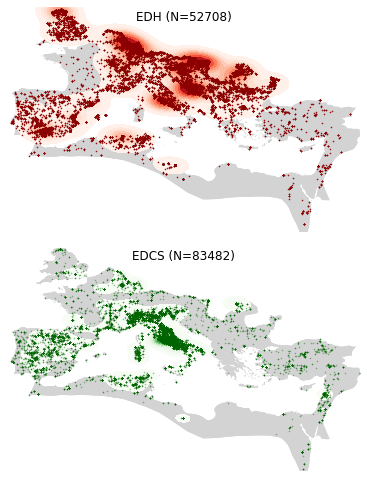

In [36]:
fig, [ax1, ax2] = plt.subplots(2, 1, figsize=[5.2, 7], tight_layout=True)

plt.rcParams['axes.titley'] = 1.0 
plt.rcParams['axes.titlepad'] = -14

pleiades_regions.plot(ax=ax1, color="lightgray")
gplt.kdeplot(EDHg, cmap='Reds', shade=True, ax=ax1) # , clip=EDHg.geometry,
EDHg.plot(ax=ax1, color="darkred", markersize=0.3)
ax1.set_axis_off()
ax1.set_xlim(-10, 41)
ax1.set_ylim(23, 55.5)
ax1.set_title("EDH (N={0})".format(len(EDHg)))

pleiades_regions.plot(ax=ax2, color="lightgray")
gplt.kdeplot(EDCSg, cmap='Greens', shade=True, ax=ax2) # , clip=EDHg.geometry,
EDCSg.plot(ax=ax2, alpha=0.4, color="darkgreen", markersize=0.3)
ax2.set_axis_off()
ax2.set_xlim(-10, 41)
ax2.set_ylim(23, 55.5)
ax2.set_title("EDCS (N={0})".format(len(EDCSg)))

In [37]:
EDH.to_json("../data/large_files/EDH_filtered.json")
EDCS.to_json("../data/large_files/EDCS_filtered.json")